# Forecasting Models Project
## time series 기법 전부

In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

# 1. Time Series Data with Seasonality
## data: google trend '휴가' 검색량 

In [8]:
df = pd.read_csv('../../Data/daily_usr_cnt_with_holiday_tot_clean.csv')
df.head()

date  cnt_station  cnt_bike  is_rain  is_holiday  year  month  day  \
0  42907          743      9855        0           0  2017      6   21   
1  42908          743      9855        0           0  2017      6   22   
2  42909          790     10415        0           0  2017      6   23   
3  42910          790     10415        1           0  2017      6   24   
4  42911          792     10455        0           0  2017      6   25   

   weekday  weeknum   cnt  
0        2       25  13.0  
1        3       25  40.0  
2        4       25  39.0  
3        5       25  28.0  
4        6       25  28.0

In [ ]:
df = df.reset_index(drop=True)
df = df.rename(columns={'cnt': 'amount', 'date': 'time'})
df

In [547]:
#time index
time_index = range(len(df))
df['time_index'] = time_index
df = df[['time', 'time_index', 'amount']]
#df['amount'] = pd.to_numeric(df['amount'])
df

time  time_index  amount
0    2017-06-21           0    13.0
1    2017-06-22           1    40.0
2    2017-06-23           2    39.0
3    2017-06-24           3    28.0
4    2017-06-25           4    28.0
..          ...         ...     ...
919  2019-12-27         919    81.0
920  2019-12-28         920    79.0
921  2019-12-29         921    61.0
922  2019-12-30         922    77.0
923  2019-12-31         923    39.0

[924 rows x 3 columns]

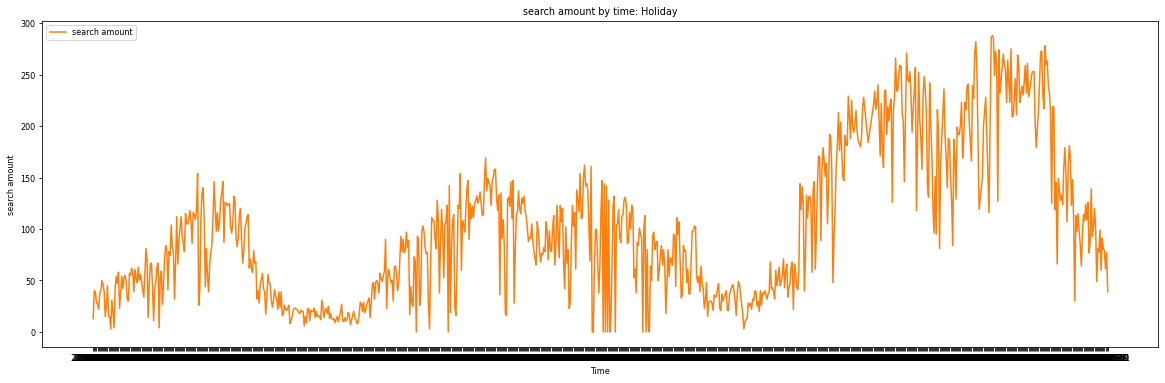

In [639]:
plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(df.time, df.amount, color='tab:orange', label='search amount')
ax.set_xlabel('Time')
#ax.set_xticklabels([], rotation =45)
ax.set_ylabel('search amount')
ax.set_title('search amount by time: Holiday')
ax.legend(loc='upper left')
plt.show()

In [549]:
orign_df = df.copy()
orign_df = orign_df.rename(columns={'bike_ts_clean': 'amount'})
val_train_data, test_data = train_test_split(orign_df, test_size=0.15, shuffle=False, random_state=0) 
train_data, valid_data = train_test_split(val_train_data, test_size=1.5/8.5, shuffle=False, random_state=0)

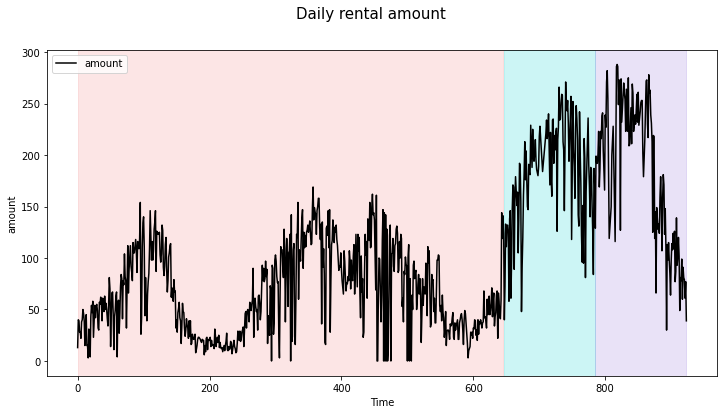

In [550]:
plt.rc('font', size=10)
fig, ax= plt.subplots(figsize=(12, 6))

ax.plot(df.amount, color='black', label='amount')
plt.axvspan(train_data.index[0], train_data.index[-1], alpha=0.2, color='lightcoral')
plt.axvspan(valid_data.index[0], valid_data.index[-1], alpha=0.2, color='darkturquoise')
plt.axvspan(test_data.index[0], test_data.index[-1], alpha=0.2, color='mediumpurple')

ax.set_xlabel('Time')
ax.set_ylabel('amount')
ax.legend(loc='upper left')

plt.suptitle("Daily rental amount", fontsize=15)
plt.show()

## 1-1. 
## A. Modeling seasonal variation using binary vaeiables

In [551]:
def forecasting_results(y_fitted, y_pred):
    # The mean squared error
    MAE = metrics.mean_absolute_error(y_valid,y_pred)
    MSE = metrics.mean_squared_error(y_valid,y_pred)
    RMSE = np.sqrt(MSE)
    R2=metrics.r2_score(y_valid,y_pred)
    print('MAE: %.2f' % MAE)
    print('MSE: %.2f' % MSE)
    print('RMSE: %.2f' % RMSE)
    print('R2: %.2f' % R2)



    # Plot outputs
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(15, 6))

    ax.plot(train_data.time, y_train, color='tab:blue', label='train')
    ax.plot(train_data.time, y_fitted, color='tab:orange', label='fitted')
    ax.plot(valid_data.time, y_valid, color='tab:green', label='valid: actual')
    ax.plot(valid_data.time, y_pred, color='tab:red', label='valid: predicted')
    ax.set_xlabel('Time')
    ax.set_xticklabels([], rotation =45)
    ax.set_ylabel('amount')
    #ax.set_title('Time series: Linear Regression')
    plt.xticks([])
    ax.legend(loc='best')

In [552]:
def forecasting_results_test(y_fitted, y_pred):
    # The mean squared error
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    R2=metrics.r2_score(y_test,y_pred)
    print('MAE: %.2f' % MAE)
    print('MSE: %.2f' % MSE)
    print('RMSE: %.2f' % RMSE)
    print('R2: %.2f' % R2)



    # Plot outputs
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(15, 6))

    ax.plot(val_train_data.time, y_val_train, color='tab:blue', label='train')
    ax.plot(val_train_data.time, y_fitted, color='tab:orange', label='fitted')
    ax.plot(test_data.time, y_test, color='tab:green', label='valid: actual')
    ax.plot(test_data.time, y_pred, color='tab:red', label='valid: predicted')
    ax.set_xlabel('Time')
    ax.set_xticklabels([], rotation =45)
    ax.set_ylabel('amount')
    #ax.set_title('Time series: Linear Regression')
    plt.xticks([])
    ax.legend(loc='best')

In [553]:
# 월별 dummy variable 추가
df_season = []
for time in df['time']:
    for i in range(0, 10):
        if '-0'+str(i)+'-' in time:
            df_season.append(i)            
    for i in range(10, 13):
        if '-'+str(i)+'-' in time:
            df_season.append(i)    

df['season'] = df_season

#one_hot encoding|
onehot = pd.get_dummies(df['season'])
df_onehot = pd.concat([df, onehot], axis=1)
df_onehot = df_onehot.drop(['time', 'season'], axis=1)
df_onehot

time_index  amount  1  2  3  4  5  6  7  8  9  10  11  12
0             0    13.0  0  0  0  0  0  1  0  0  0   0   0   0
1             1    40.0  0  0  0  0  0  1  0  0  0   0   0   0
2             2    39.0  0  0  0  0  0  1  0  0  0   0   0   0
3             3    28.0  0  0  0  0  0  1  0  0  0   0   0   0
4             4    28.0  0  0  0  0  0  1  0  0  0   0   0   0
..          ...     ... .. .. .. .. .. .. .. .. ..  ..  ..  ..
919         919    81.0  0  0  0  0  0  0  0  0  0   0   0   1
920         920    79.0  0  0  0  0  0  0  0  0  0   0   0   1
921         921    61.0  0  0  0  0  0  0  0  0  0   0   0   1
922         922    77.0  0  0  0  0  0  0  0  0  0   0   0   1
923         923    39.0  0  0  0  0  0  0  0  0  0   0   0   1

[924 rows x 14 columns]

In [554]:
#train:test = 8:2
X = df_onehot.loc[:, df_onehot.columns != 'amount']
X_val_train, X_test = train_test_split(X, test_size=0.15, shuffle=False, random_state=0) 
X_train, X_valid = train_test_split(X_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

y = df_onehot['amount']
y_val_train, y_test = train_test_split(y, test_size=0.15, shuffle=False, random_state=0) 
y_train, y_valid = train_test_split(y_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

MAE: 76.62
MSE: 7257.75
RMSE: 85.19
R2: -1.99


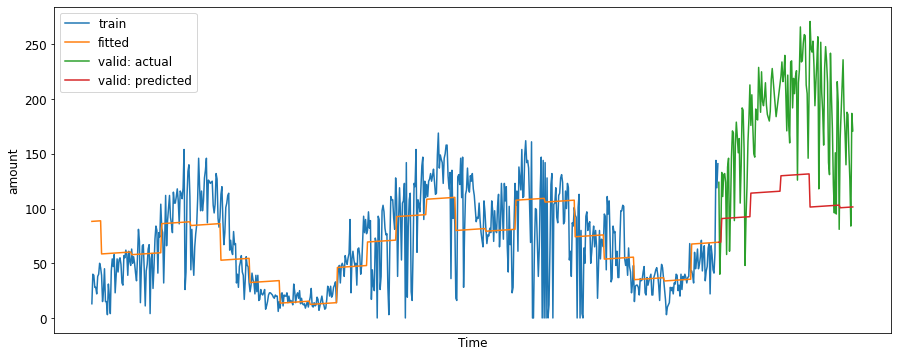

In [555]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_fitted = model.predict(X_train)
y_pred = model.predict(X_valid)

forecasting_results(y_fitted, y_pred)

MAE: 53.31
MSE: 3957.70
RMSE: 62.91
R2: 0.14


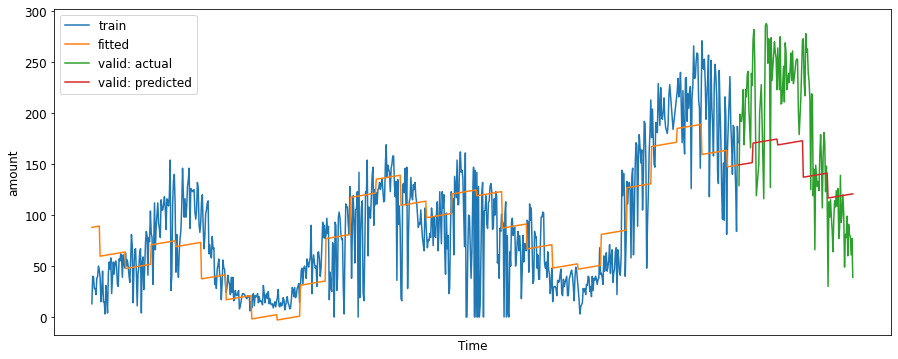

In [556]:
# Linear Regression
model = LinearRegression()
model.fit(X_val_train, y_val_train)

y_fitted = model.predict(X_val_train)
y_pred = model.predict(X_test)

forecasting_results_test(y_fitted, y_pred)

## B.Trigonometric Model

In [557]:
df_tri = df.copy()

#sin, cos variable 추가
sin_1 = []
cos_1 = []
sin_2 = []
cos_2 = []

for i in df_tri['time_index']:
    sin_1.append(np.sin(2*np.pi*i / 12))
    cos_1.append(np.cos(2*np.pi*i / 12))
    sin_2.append(np.sin(4*np.pi*i / 12))
    cos_2.append(np.cos(4*np.pi*i / 12))

df_tri['sin_1'] = sin_1
df_tri['cos_1'] = cos_1
df_tri['sin_2'] = sin_2
df_tri['cos_2'] = cos_2
df_tri = df_tri.drop(['time', 'season'], axis=1)

In [558]:
df_tri

time_index  amount     sin_1         cos_1         sin_2  cos_2
0             0    13.0  0.000000  1.000000e+00  0.000000e+00    1.0
1             1    40.0  0.500000  8.660254e-01  8.660254e-01    0.5
2             2    39.0  0.866025  5.000000e-01  8.660254e-01   -0.5
3             3    28.0  1.000000  6.123234e-17  1.224647e-16   -1.0
4             4    28.0  0.866025 -5.000000e-01 -8.660254e-01   -0.5
..          ...     ...       ...           ...           ...    ...
919         919    81.0 -0.500000 -8.660254e-01  8.660254e-01    0.5
920         920    79.0 -0.866025 -5.000000e-01  8.660254e-01   -0.5
921         921    61.0 -1.000000 -6.363830e-15  1.272766e-14   -1.0
922         922    77.0 -0.866025  5.000000e-01 -8.660254e-01   -0.5
923         923    39.0 -0.500000  8.660254e-01 -8.660254e-01    0.5

[924 rows x 6 columns]

### B-(1). sin, cos term 각 하나씩

In [559]:
df_tri_1 = df_tri.drop(['sin_2', 'cos_2'], axis=1)

#train:test = 8:2
X = df_tri_1.loc[:, df_tri_1.columns != 'amount']
X_val_train, X_test = train_test_split(X, test_size=0.15, shuffle=False, random_state=0) 
X_train, X_valid = train_test_split(X_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

y = df_tri_1['amount']
y_val_train, y_test = train_test_split(y, test_size=0.15, shuffle=False, random_state=0) 
y_train, y_valid = train_test_split(y_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

MAE: 111.52
MSE: 14593.00
RMSE: 120.80
R2: -5.02


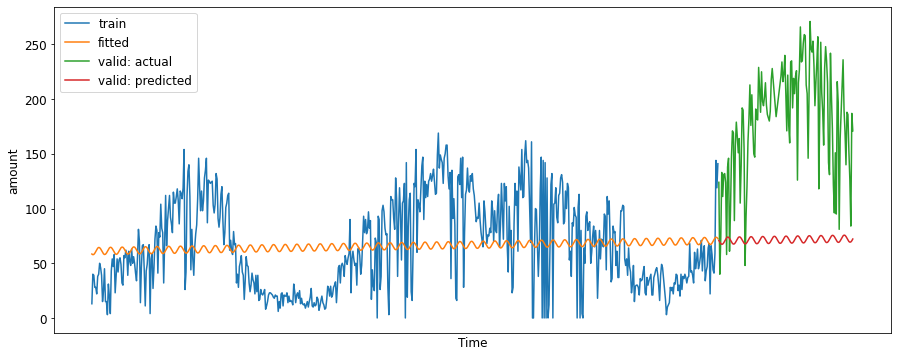

In [560]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_fitted = model.predict(X_train)
y_pred = model.predict(X_valid)
forecasting_results(y_fitted, y_pred)

MAE: 69.73
MSE: 6177.32
RMSE: 78.60
R2: -0.34


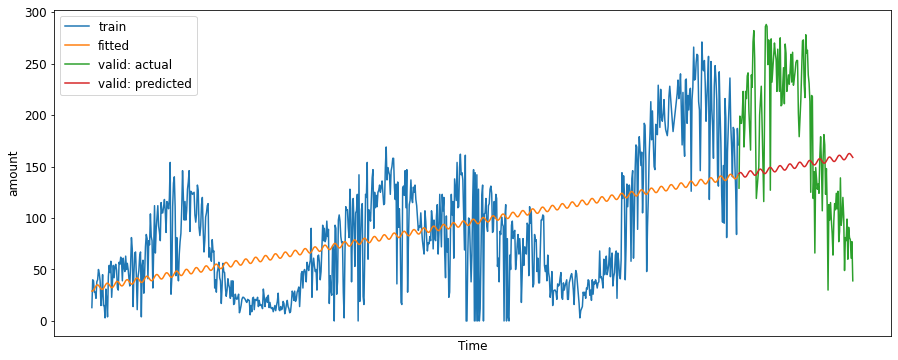

In [561]:
# Linear Regression
model = LinearRegression()
model.fit(X_val_train, y_val_train)

y_fitted = model.predict(X_val_train)
y_pred = model.predict(X_test)

forecasting_results_test(y_fitted, y_pred)

### B-(1). sin, cos term 각 두 개씩

In [562]:
#train:test = 8:2
X = df_tri.loc[:, df_tri.columns != 'amount']
X_val_train, X_test = train_test_split(X, test_size=0.15, shuffle=False, random_state=0) 
X_train, X_valid = train_test_split(X_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

y = df_tri_1['amount']
y_val_train, y_test = train_test_split(y, test_size=0.15, shuffle=False, random_state=0) 
y_train, y_valid = train_test_split(y_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

MAE: 111.47
MSE: 14605.31
RMSE: 120.85
R2: -5.03


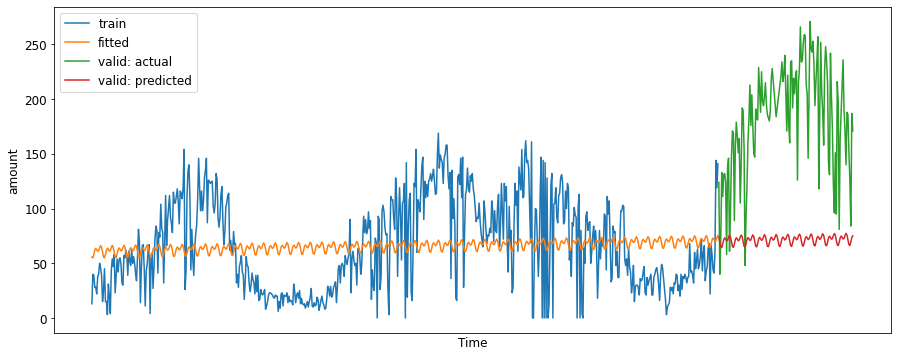

In [563]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_fitted = model.predict(X_train)
y_pred = model.predict(X_valid)
forecasting_results(y_fitted, y_pred)

MAE: 69.86
MSE: 6182.11
RMSE: 78.63
R2: -0.34


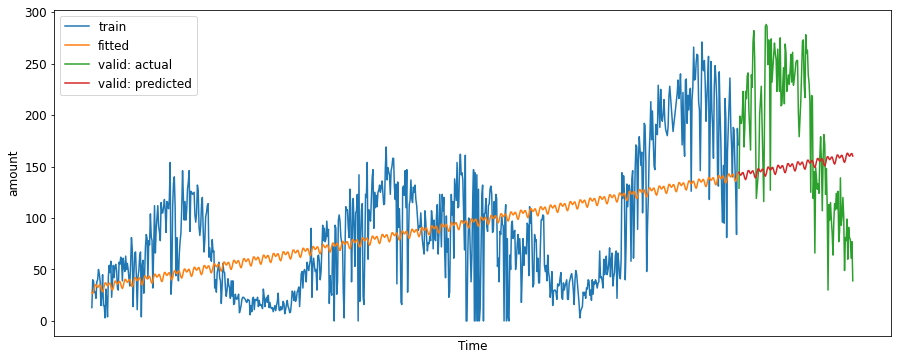

In [564]:
# Linear Regression
model = LinearRegression()
model.fit(X_val_train, y_val_train)

y_fitted = model.predict(X_val_train)
y_pred = model.predict(X_test)

forecasting_results_test(y_fitted, y_pred)

## C. 구간 평균법

In [663]:
def range_average(df, target, N):
    avg_N = []
    for i in range(N-1):
        avg_N.append(0)
    
    for j in range(0, len(df)-N+1):
        avg = np.mean(df[target][j:j+N])
        avg_N.append(avg)
    
    return avg_N

In [664]:
df = orign_df.copy()

#train:test = 8:2
X = df.loc[:, df.columns != 'amount']
X_val_train, X_test = train_test_split(X, test_size=0.15, shuffle=False, random_state=0) 
X_train, X_valid = train_test_split(X_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

y = df['amount']
y_val_train, y_test = train_test_split(y, test_size=0.15, shuffle=False, random_state=0) 
y_train, y_valid = train_test_split(y_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)


trn_val, test = train_test_split(df, test_size=0.15, shuffle=False, random_state=0) 
train, valid = train_test_split(trn_val, test_size=1.5/8.5, shuffle=False, random_state=0) 

MAE: 85.35
MSE: 9002.31
RMSE: 94.88
R2: -2.71


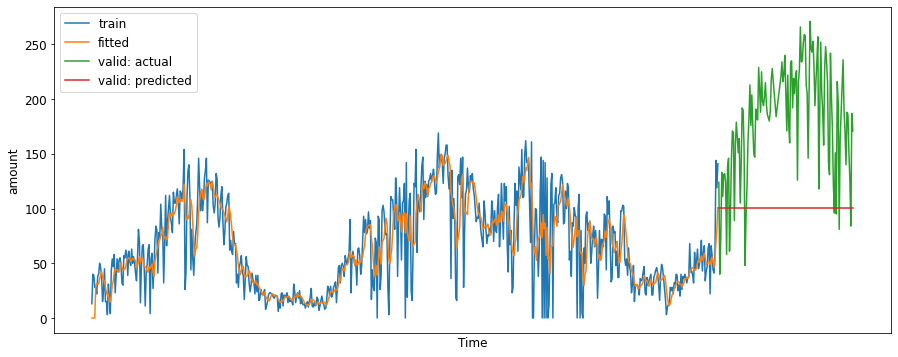

In [665]:
y_fitted = range_average(train, 'amount', 5)
y_pred = []
for i in range(len(X_valid)):
    y_pred.append(y_fitted[-1]) 

forecasting_results(y_fitted, y_pred)

In [669]:
import numpy as np
import plotly.graph_objects as go

# 시각화
# https://community.plotly.com/t/plotly-colours-list/11730/2

fig=go.Figure()
fig.add_trace(go.Scatter(x=X_train, y=y_train,mode='lines', 
                         line = dict(color = '#1f77b4'), name='y_true')) # muted blue
fig.add_trace(go.Scatter(x=X_train, y=y_fitted,mode='lines',
                         line = dict(color = '#ff7f0e'), name='y_pred')) # safety orange
fig.add_trace(go.Scatter(x=X_valid, y=y_valid,mode='lines',
                         line = dict(color = '#1f77b4'), name='y_true')) # muted blue
fig.add_trace(go.Scatter(x=X_valid, y=y_pred,mode='lines',
                         line = dict(color = '#bcbd22'),name='y_pred')) # curry yellow-green
fig.show()


# 출력
#fig.write_image("fig_plotly.jpeg")

MAE: 68.29
MSE: 6137.96
RMSE: 78.35
R2: -0.33


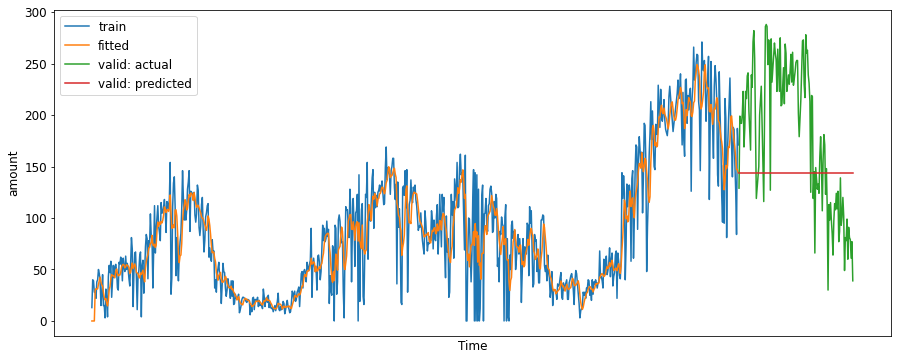

In [568]:
y_fitted = range_average(trn_val, 'amount', 5)
y_pred = []
for i in range(len(X_test)):
    y_pred.append(y_fitted[-1]) 

forecasting_results_test(y_fitted, y_pred)

## D. Simple Exponential Smoothing

MAE: 92.88
MSE: 10519.58
RMSE: 102.56
R2: -3.34


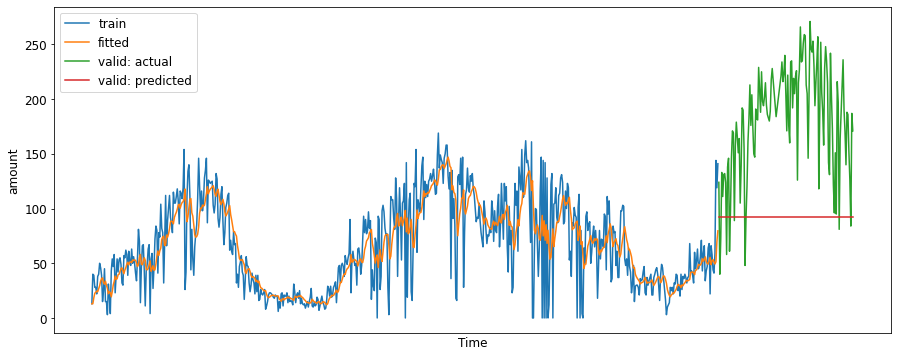

In [702]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

X = df['time'].values
X_val_train, X_test = train_test_split(X, test_size=0.15, shuffle=False, random_state=0) 
X_train, X_valid = train_test_split(X_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)

y = df['amount'].values
y_val_train, y_test = train_test_split(y, test_size=0.15, shuffle=False, random_state=0) 
y_train, y_valid = train_test_split(y_val_train, test_size=1.5/8.5, shuffle=False, random_state=0)


data = pd.Series(y.tolist(), X.tolist())
train = pd.Series(y_train.tolist(), X_train.tolist())
trn_val = pd.Series(y_val_train.tolist(), X_val_train.tolist())

#SES
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.2,optimized=False)
y_fitted = fit1.fittedvalues
y_pred = fit1.forecast(len(X_valid)).rename('alpha=0.2')

forecasting_results(y_fitted, y_pred)

MAE: 64.34
MSE: 5209.81
RMSE: 72.18
R2: -0.13


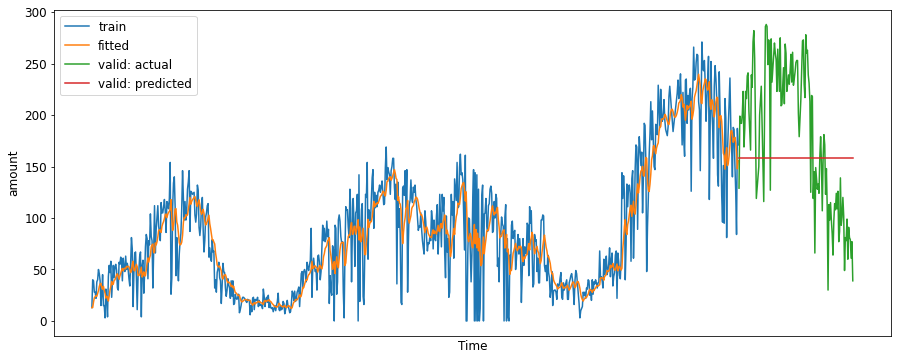

In [683]:
fit1 = SimpleExpSmoothing(trn_val).fit(smoothing_level=0.2,optimized=False)
y_fitted = fit1.fittedvalues
y_pred = fit1.forecast(len(X_test)).rename('alpha=0.2')

forecasting_results_test(y_fitted, y_pred)

## E. Double Exponential Smoothing

MAE: 80.80
MSE: 8075.76
RMSE: 89.87
R2: -2.33


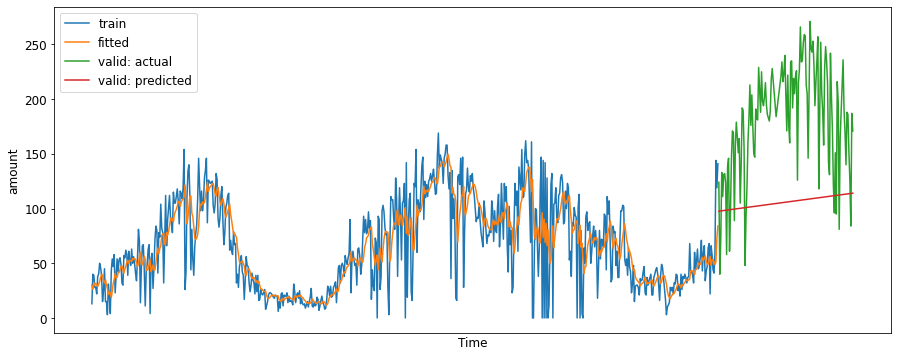

In [571]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit1 = ExponentialSmoothing(train, trend='add').fit()
y_fitted = fit1.fittedvalues
y_pred = fit1.forecast(len(X_valid)).rename('alpha=0.2')

forecasting_results(y_fitted, y_pred)

## F. Holt-Winters

### (1) Additive Holt-Winters 

MAE: 68.07
MSE: 6001.00
RMSE: 77.47
R2: -1.48


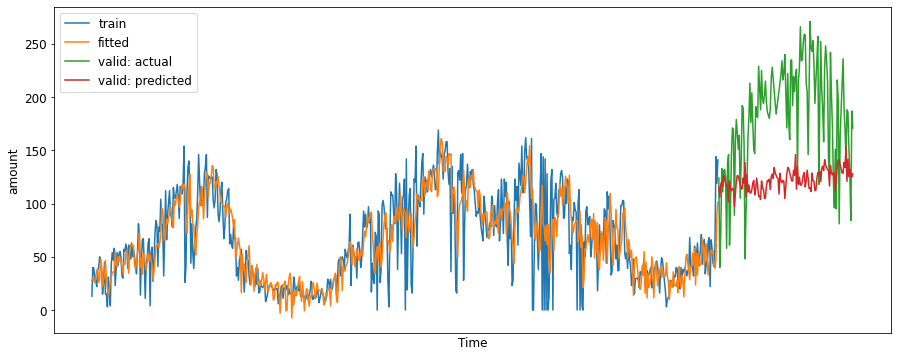

In [572]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit1 = ExponentialSmoothing(train, trend='add',seasonal='add',seasonal_periods=52).fit()
y_fitted = fit1.fittedvalues
y_pred = fit1.forecast(len(X_valid))

forecasting_results(y_fitted, y_pred)

### (2) Multiplicative Holt-Winters   --> error

In [705]:
train_mul = train.copy()
for i in range(len(train)):
    if train_mul[i] == 0:
        train_mul[i] = 1

trn_val_mul = trn_val.copy()
for i in range(len(trn_val)):
    if trn_val_mul[i] == 0:
        trn_val_mul[i] = 1

MAE: 98.05
MSE: 20305.56
RMSE: 142.50
R2: -7.38


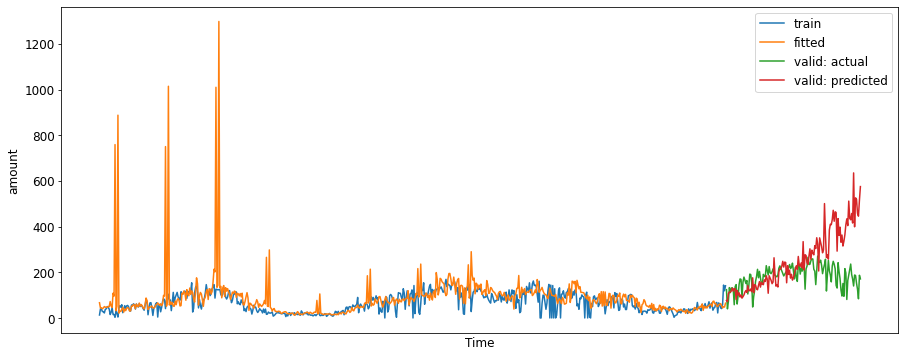

In [706]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit1 = ExponentialSmoothing(train_mul, trend = 'mul', seasonal='mul',seasonal_periods=52).fit()
y_fitted = fit1.fittedvalues
y_pred = fit1.forecast(len(X_valid))

forecasting_results(y_fitted, y_pred)

## 1-2. Holt-Winters parameter optimization
###: alpha, beta, delta 세 개의 parameter에 대해 [0, 1]에서 0.1 간격으로 grid search 수행

### (1) Additive Holt-Winters 

MAE: 520.04
MSE: 353839.86
RMSE: 594.84
R2: -145.01
best parameters:  [0.6000000000000001, 0.9, 0.1]
minimum mse:  2656.205920235636


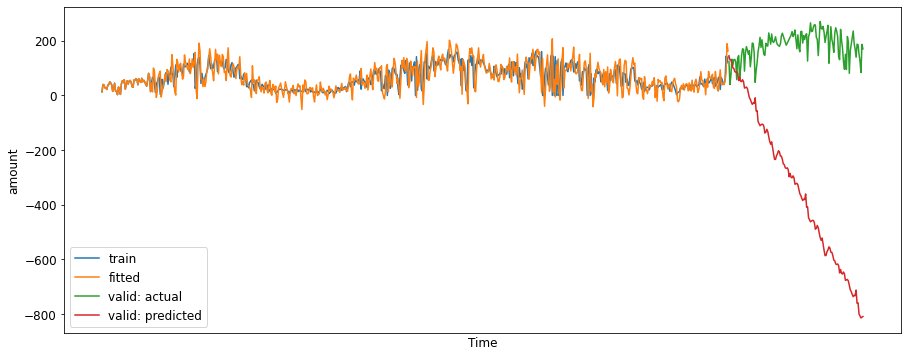

In [709]:
y_test_after_10 = y_test[10:]

from itertools import product

alpha = list(np.arange(0, 1, 0.1))
beta = list(np.arange(0, 1, 0.1))
delta = list(np.arange(0, 1, 0.1))
param_set = list(product(alpha, beta, delta))

mse = []
predicted = []
parameters = []

for alpha, beta, delta in param_set:
    fit1 = ExponentialSmoothing(train, trend='add',seasonal='add', seasonal_periods=52).fit(smoothing_level=alpha, smoothing_slope=beta,
smoothing_seasonal=delta)
    y_pred = fit1.forecast(len(X_valid))
    predicted.append(y_pred)
    parameters.append([alpha, beta, delta])

    # The mean squared error
    mse.append(mean_squared_error(y_valid, y_pred))

# 탐색 영역 내 최적의 parameter
best_index = mse.index(min(mse))
best_param = parameters[best_index]
opt_fit = ExponentialSmoothing(train, trend='add',seasonal='add',seasonal_periods=52).fit(smoothing_level=best_param[0],smoothing_slope=best_param[1],
smoothing_seasonal=best_param[2], optimized=False)
y_pred_opt = opt_fit.forecast(len(X_valid))
y_fitted = opt_fit.fittedvalues

forecasting_results(y_fitted, y_pred_opt)

#parameter 따른 mse값
mse_all = pd.DataFrame({'parameters [alpha, beta, delta]': parameters, 'mse': mse})
#print(mse_all)

print('best parameters: ', best_param)
print('minimum mse: ', min(mse))

In [710]:
print('best result: ',mse_all.iloc[best_index])

best result:  parameters [alpha, beta, delta]    [0.6000000000000001, 0.9, 0.1]
mse                                                       2656.21
Name: 691, dtype: object


MAE: 1677.11
MSE: 3814094.76
RMSE: 1952.97
R2: -824.40


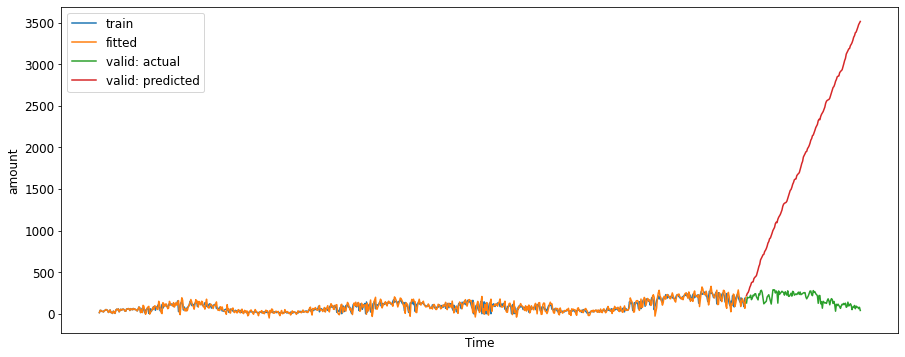

In [711]:
opt_fit = ExponentialSmoothing(trn_val, trend='add',seasonal='add',seasonal_periods=52).fit(smoothing_level=best_param[0],smoothing_slope=best_param[1],
smoothing_seasonal=best_param[2], optimized=False)
y_pred_opt = opt_fit.forecast(len(X_test))
y_fitted = opt_fit.fittedvalues

forecasting_results_test(y_fitted, y_pred_opt)

### (2) Multiplicative Holt-Winters   ---> error

MAE: 87.35
MSE: 13554.12
RMSE: 116.42
R2: -4.59
best parameters:  [0.0, 0.0, 0.9]
minimum mse:  13554.118013226223


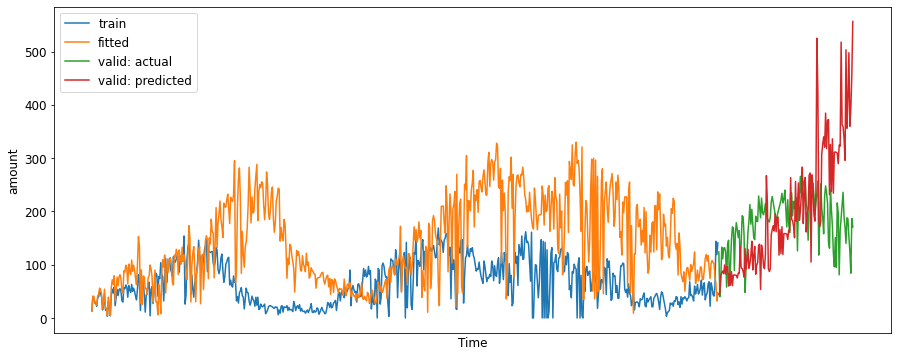

In [731]:
mse = []
predicted = []
parameters = []

for alpha, beta, delta in param_set:
    fit1 = ExponentialSmoothing(train_mul, trend='mul',seasonal='mul', seasonal_periods=52).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=delta)
    y_pred = fit1.forecast(len(X_valid))
    predicted.append(y_pred)
    parameters.append([alpha, beta, delta])


    # The mean squared error
    try:
        mse.append(mean_squared_error(y_valid, y_pred))
    except:
        mse.append(100000000)

# 탐색 영역 내 최적의 parameter
best_index = mse.index(min(mse))
best_param = parameters[best_index]
opt_fit = ExponentialSmoothing(train_mul, trend='mul',seasonal='mul',seasonal_periods=52).fit(smoothing_level=best_param[0],smoothing_slope=best_param[1],
smoothing_seasonal=best_param[2], optimized=False)
y_pred_opt = opt_fit.forecast(len(X_valid))
y_fitted = opt_fit.fittedvalues


forecasting_results(y_fitted, y_pred_opt)

#parameter 따른 mse값
mse_all = pd.DataFrame({'parameters [alpha, beta, delta]': parameters, 'mse': mse})
#print(mse_all)
print('best parameters: ', best_param)
print('minimum mse: ', min(mse))

In [734]:
print('best result: ',mse_all.iloc[best_index])

best result:  parameters [alpha, beta, delta]    [0.0, 0.0, 0.9]
mse                                        13554.1
Name: 9, dtype: object


MAE: 716.28
MSE: 846846.32
RMSE: 920.24
R2: -182.26


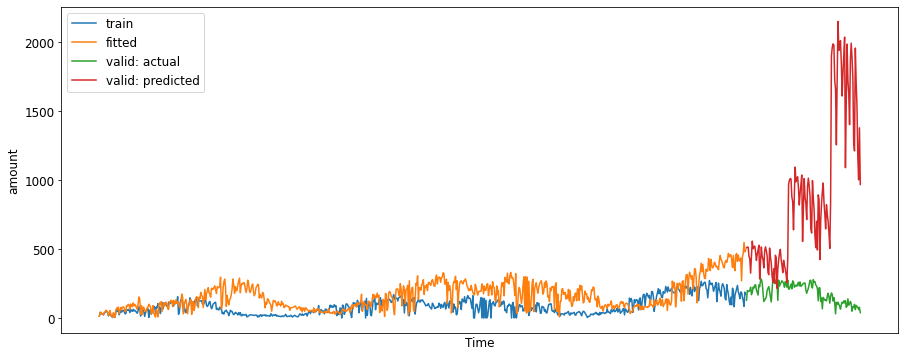

In [735]:
opt_fit = ExponentialSmoothing(trn_val_mul, trend='mul',seasonal='mul',seasonal_periods=52).fit(smoothing_level=best_param[0],smoothing_slope=best_param[1],
smoothing_seasonal=best_param[2], optimized=False)
y_pred_opt = opt_fit.forecast(len(X_test))
y_fitted = opt_fit.fittedvalues

forecasting_results_test(y_fitted, y_pred_opt)

mse.append(mean_squared_error(y_valid, y_pred))

### (1) Simple Exponential Smoothing

MAE: 56.72
MSE: 4267.90
RMSE: 65.33
R2: -0.76
best parameters:  0.9
minimum mse:  4267.897088295172
r2: -0.7610707820105589


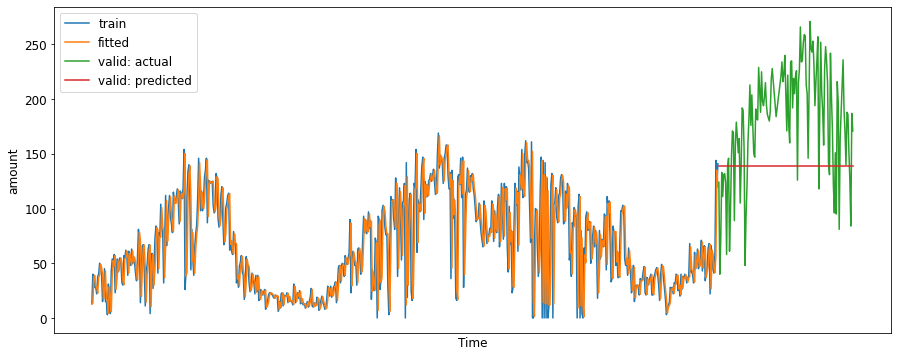

In [626]:
alpha = list(np.arange(0, 1, 0.1))

mse = []
predicted = []
parameters = []
#SES
for alpha in alpha:
    fit1 = SimpleExpSmoothing(train).fit(smoothing_level=alpha,optimized=False)
    y_pred = fit1.forecast(len(X_valid)).rename('alpha=0.2')
    predicted.append(y_pred)
    parameters.append(alpha)
    
    mse.append(mean_squared_error(y_valid, y_pred))


# 탐색 영역 내 최적의 parameter
best_index = mse.index(min(mse))
best_param = parameters[best_index]
opt_fit = SimpleExpSmoothing(train).fit(smoothing_level=best_param,optimized=False)
y_pred_opt = opt_fit.forecast(len(X_valid))
y_fitted = opt_fit.fittedvalues


forecasting_results(y_fitted, y_pred_opt)

#parameter 따른 mse값
mse_all = pd.DataFrame({'parameters alpha': parameters, 'mse': mse})
#print(mse_all)

print('best parameters: ', best_param)
print('minimum mse: ', min(mse))
print('r2:', r2_score(y_valid,y_pred_opt))

MAE: 61.76
MSE: 4749.36
RMSE: 68.92
R2: -0.03


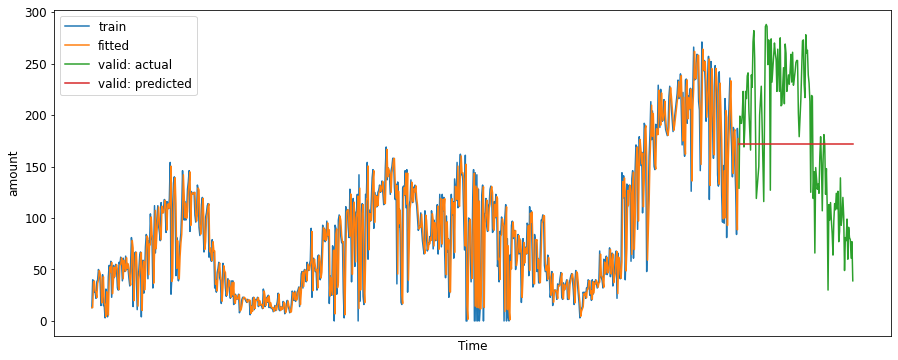

In [627]:
opt_fit = SimpleExpSmoothing(trn_val).fit(smoothing_level=best_param,optimized=False)
y_pred_opt = opt_fit.forecast(len(X_test))
y_fitted = opt_fit.fittedvalues

forecasting_results_test(y_fitted, y_pred_opt)

### Double Exponential Smoothing

MAE: 79.98
MSE: 12562.14
RMSE: 112.08
R2: -4.18
best parameters:  [0.1, 0.1]
minimum mse:  12562.137780221243


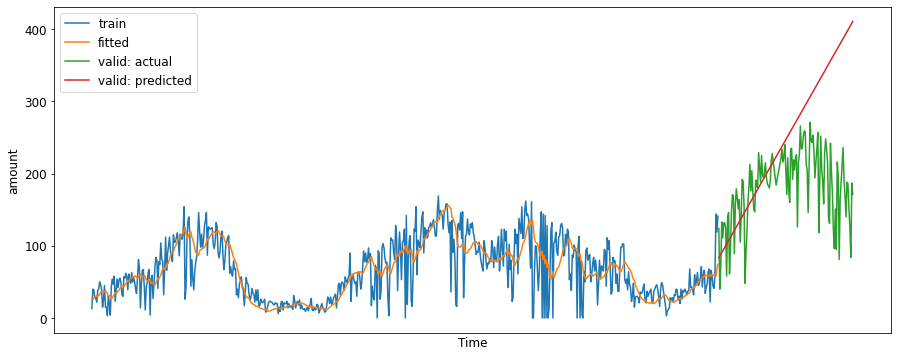

In [628]:
alpha = list(np.arange(0.1, 1, 0.1))
beta = list(np.arange(0.1, 1, 0.1))

mse = []
predicted = []
parameters = []

#DES
for alpha, beta in list(product(alpha, beta)):
    fit1 = ExponentialSmoothing(train, trend='add').fit(smoothing_level=alpha, smoothing_slope=beta)
    y_pred = fit1.forecast(len(X_valid))
    predicted.append(y_pred)
    parameters.append([alpha, beta])

    #최소 10 시점 이후 예측
    y_pred_after_10 = y_pred[10:]  

    # The mean squared error
    mse.append(mean_squared_error(y_valid, y_pred))


# 탐색 영역 내 최적의 parameter
best_index = mse.index(min(mse))
best_param = parameters[best_index]
opt_fit = ExponentialSmoothing(train, trend='add').fit(smoothing_level=best_param[0], smoothing_slope=best_param[1])
y_pred_opt = opt_fit.forecast(len(X_valid))
y_fitted = opt_fit.fittedvalues

forecasting_results(y_fitted, y_pred_opt)

#parameter 따른 mse값
mse_all = pd.DataFrame({'parameters [alpha, beta]': parameters, 'mse': mse})

print('best parameters: ', best_param)
print('minimum mse: ', min(mse))

MAE: 128.00
MSE: 19166.37
RMSE: 138.44
R2: -3.15


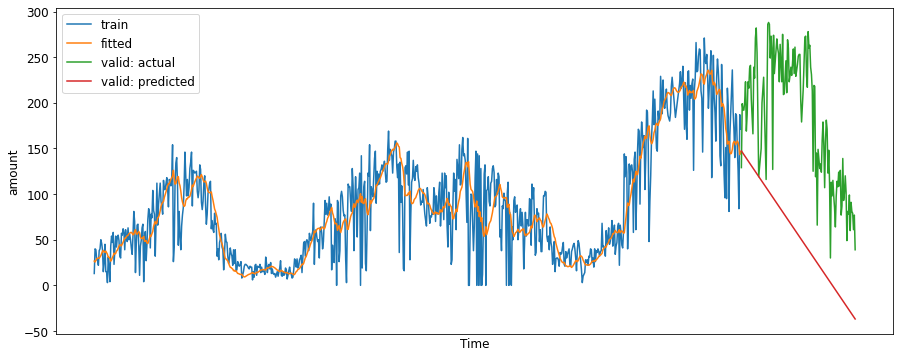

In [629]:
opt_fit = ExponentialSmoothing(trn_val, trend='add').fit(smoothing_level=best_param[0], smoothing_slope=best_param[1])
y_pred_opt = opt_fit.forecast(len(X_test))
y_fitted = opt_fit.fittedvalues

forecasting_results_test(y_fitted, y_pred_opt)

## HMM   - multivaruate

In [2]:
from hmmlearn import hmm
np.random.seed(3)

NameError: name 'np' is not defined

In [910]:
df = pd.read_csv('./data/daily_usr_cnt_with_holiday_tot_clean.csv')
df.set_index('date', inplace=True)
X = df[['cnt_station', 'cnt_bike', 'cnt']]
X

cnt_station  cnt_bike   cnt
date                                   
2017-06-21          743      9855  13.0
2017-06-22          743      9855  40.0
2017-06-23          790     10415  39.0
2017-06-24          790     10415  28.0
2017-06-25          792     10455  28.0
...                 ...       ...   ...
2019-12-27         1530     19474  81.0
2019-12-28         1530     19474  79.0
2019-12-29         1530     19474  61.0
2019-12-30         1530     19474  77.0
2019-12-31         1530     19474  39.0

[924 rows x 3 columns]

In [911]:
hmm_X = []
for i in range(len(X)):
    hmm_X.append([x for x in X.iloc[i].values])
hmm_X = np.array(hmm_X)
hmm_X

array([[7.4300e+02, 9.8550e+03, 1.3000e+01],
       [7.4300e+02, 9.8550e+03, 4.0000e+01],
       [7.9000e+02, 1.0415e+04, 3.9000e+01],
       ...,
       [1.5300e+03, 1.9474e+04, 6.1000e+01],
       [1.5300e+03, 1.9474e+04, 7.7000e+01],
       [1.5300e+03, 1.9474e+04, 3.9000e+01]])

In [912]:
train, test = train_test_split(X, test_size=0.2, shuffle=False, random_state=0) 
train_X, test_X = train_test_split(hmm_X, test_size=0.2, shuffle=False, random_state=0) 

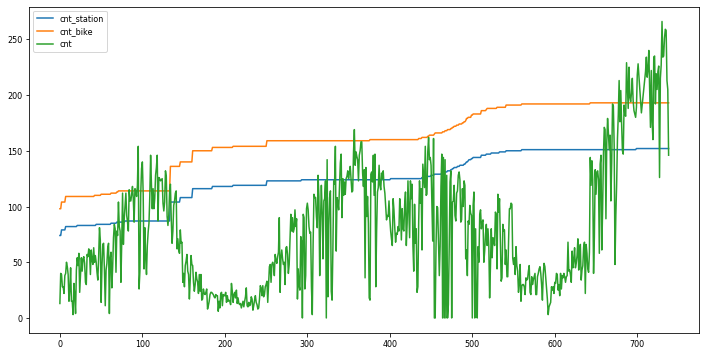

In [913]:
plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_X[:,0]//10, label=X.columns[0])
ax.plot(train_X[:,1]//100,  label=X.columns[1])
ax.plot(train_X[:,2], label=X.columns[2])
plt.legend(loc='best')

In [914]:
model = hmm.GaussianHMM(n_components=4, n_iter=len(train_X)).fit(train_X)
model

GaussianHMM(n_components=4, n_iter=739)

In [915]:
train_h = model.decode(train_X)[1]

No handles with labels found to put in legend.


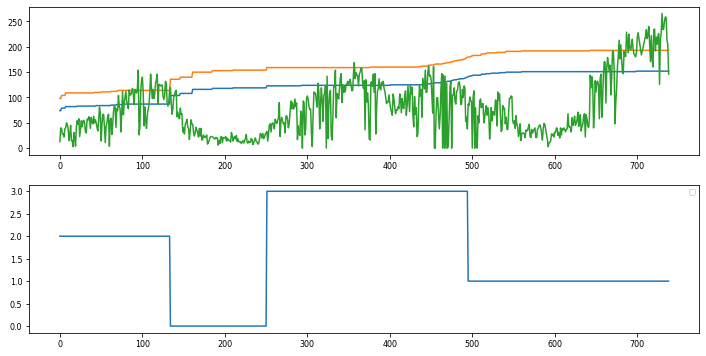

In [916]:
plt.rc('font', size=8)
fig, ax = plt.subplots(2, figsize=(12, 6))

ax[0].plot(train_X[:,0]//10, label=X.columns[0])
ax[0].plot(train_X[:,1]//100,  label=X.columns[1])
ax[0].plot(train_X[:,2], label=X.columns[2])
plt.legend(loc='best')
ax[1].plot(train_h)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


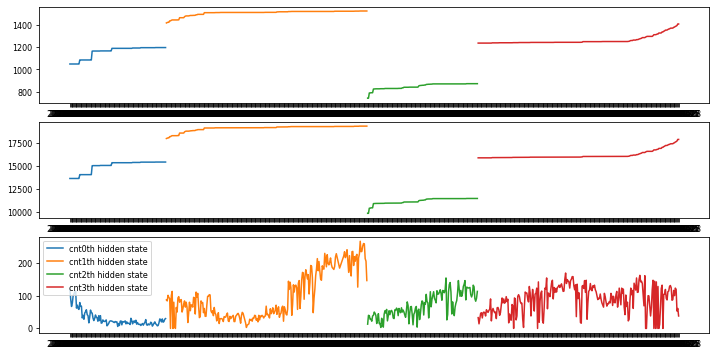

In [917]:
fig, ax = plt.subplots(3, figsize=(12, 6))

for i in range(4):
    # use fancy indexing to plot data in each state
    idx = (train_h == i)
    for j in range(len(train.columns)):
        ax[j].plot(train.index[idx],train[train.columns[j]][idx], label=train.columns[j]+"%dth hidden state" % i)
        plt.legend()

In [918]:
train_h = pd.DataFrame({"hidden_state":train_h})
train_h = train_h.set_index(train.index)S
train_h

SyntaxError: invalid syntax (<ipython-input-918-e0451d224c93>, line 2)

In [ ]:
train_state = pd.concat([train, train_h], axis=1)
train_state

test

In [814]:
print(model.startprob_)
print('---')
print(model.transmat_)
print('---')
print(model.means_)
print('---')
print(model.covars_)

[0. 0. 1. 0.]
---
[[1.00000000e+000 3.22527810e-159 0.00000000e+000 8.46412387e-060]
 [2.33307538e-085 8.65652778e-001 5.39508271e-209 1.34347222e-001]
 [0.00000000e+000 7.46268657e-003 9.92537313e-001 4.02290902e-045]
 [8.77487169e-003 3.36685079e-001 0.00000000e+000 6.54540049e-001]]
---
[[1.51521222e+03 1.92743448e+04 8.58597486e-02 5.55563079e-02
  1.07316282e+02]
 [1.22241779e+03 1.57505067e+04 0.00000000e+00 5.80123796e-02
  7.26637163e+01]
 [8.49843284e+02 1.11996791e+04 2.16417910e-01 3.73134328e-02
  7.07238806e+01]
 [1.33825247e+03 1.71256779e+04 5.87916403e-01 8.77487169e-03
  6.27203519e+01]]
---
[[[2.58537696e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 4.61110297e+03 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 7.85383579e-02 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.25203103e-02
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000